<a href="https://colab.research.google.com/github/SOUMYA2402/Pandas-and-ML/blob/main/Normalisation(Min_Max).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("wine_data.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df=df.iloc[:, :3]


In [4]:
df.columns = ['Class', 'Alcohol', 'Malic Acid']
df.head()


,Class,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

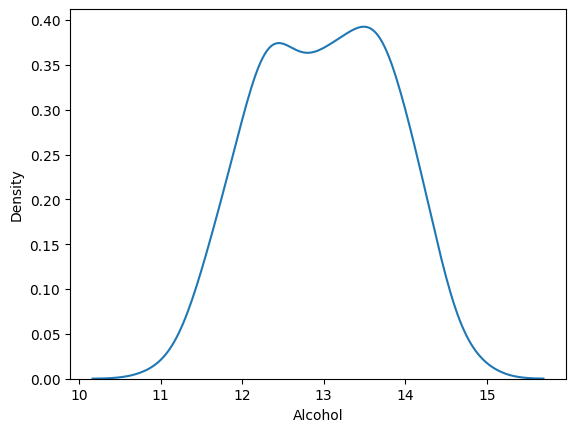

In [5]:
sns.kdeplot(data=df, x='Alcohol')

<Axes: xlabel='Malic Acid', ylabel='Density'>

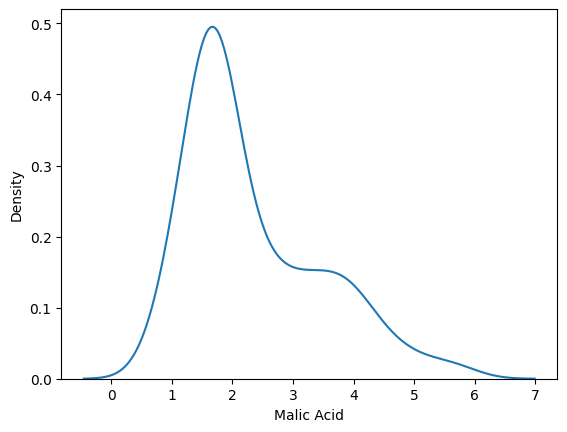

In [6]:
sns.kdeplot(data=df, x='Malic Acid')

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

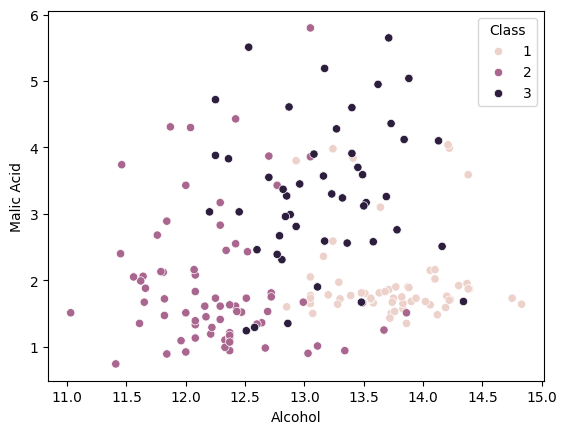

In [7]:
sns.scatterplot(data=df, x='Alcohol', y='Malic Acid', hue='Class')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
X_train.head()

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [11]:
y_train.head()

,Class
22,1
108,2
175,3
145,3
71,2


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [37]:
X_train.describe()

,Alcohol,Malic Acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [38]:
(X_train.describe()).round(1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [39]:
X_train_scaled.describe()

,Alcohol,Malic Acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [40]:
X_train_scaled.describe().round(1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<ipython-input-43-9a034f3e962d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


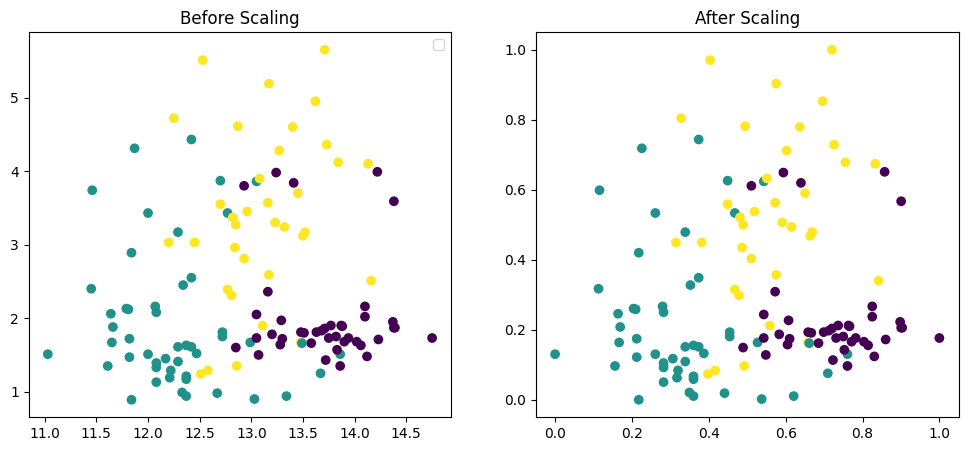

In [43]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title("Before Scaling")
ax1.legend()

# Plot after scaling
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title("After Scaling")
ax2.legend

# Display the plots
plt.show()


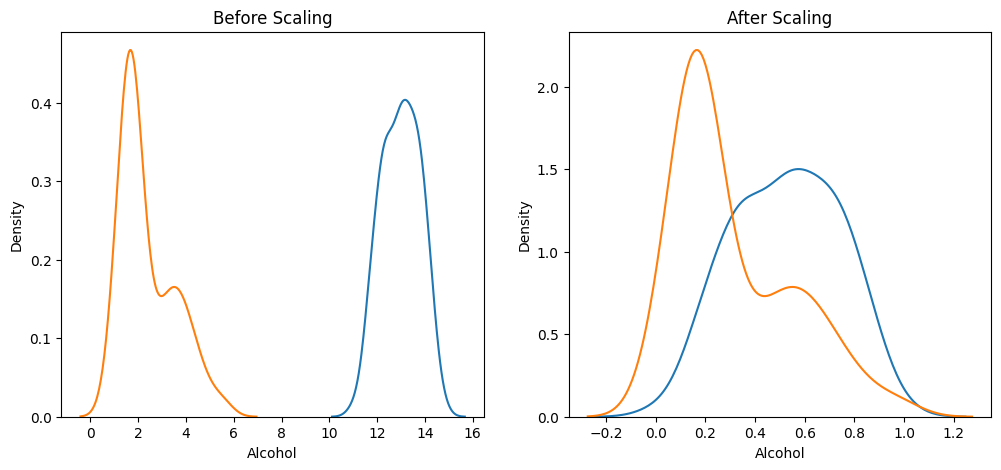

In [58]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling
sns.kdeplot(x=X_train['Alcohol'], ax=ax1)
sns.kdeplot(x=X_train['Malic Acid'], ax=ax1)

ax1.set_title("Before Scaling")


# Plot after scaling
sns.kdeplot(x=X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x=X_train_scaled['Malic Acid'],ax=ax2)
ax2.set_title("After Scaling")

# Display the plots
plt.show()
